In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

8


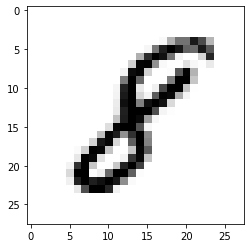

In [2]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 13s 222us/sample - loss: 0.2104 - acc: 0.9373
Epoch 2/10
60000/60000 [==============================] - 18s 304us/sample - loss: 0.0853 - acc: 0.9739
Epoch 3/10
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0601 - acc: 0.9813
Epoch 4/10
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0462 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0369 - acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0297 - acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0246 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0227 - acc: 0.9923
Epoch 9/10
60000/60000 [==============================] - 21s 342us/sample - loss: 0.0212 - acc: 0.9929
Epoch 10/10
60000/60000 [==============================] - 21s 3

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0549 - acc: 0.9860


[0.05485603105735008, 0.986]

7


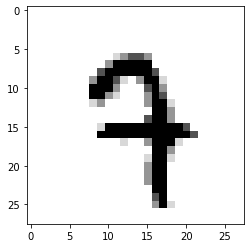

In [8]:
image_index = 3333
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())